In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("cardio_train.csv")

# Data Analyze

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output
0,0,18393,2,168,62,0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,0,100,60,1,1,0,0,0,0


# Feature Engineering 

In [4]:
data["age"] = round(data["age"] / 365)

In [5]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output
0,0,50.0,2,168,62,0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85,0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64,0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82,0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56,0,100,60,1,1,0,0,0,0


In [6]:
data.shape

(70000, 14)

In [7]:
data.isnull().values.any()

False

In [8]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
output         0
dtype: int64

In [9]:
data.isnull().sum().sum()

0

In [10]:
# data['BMI'] = data['weight']/((data['height']/100)**2)

In [11]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output
0,0,50.0,2,168,62,0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85,0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64,0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82,0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56,0,100,60,1,1,0,0,0,0


In [12]:
data['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [13]:
data.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [14]:
print(data['gluc'].unique())

[1 3 2]


In [15]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output
0,0,50.0,2,168,62,0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85,0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64,0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82,0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56,0,100,60,1,1,0,0,0,0


In [16]:
data.duplicated().sum()

0

In [17]:
X=data[['height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']] 

y=data['output']

data_categorical = data.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

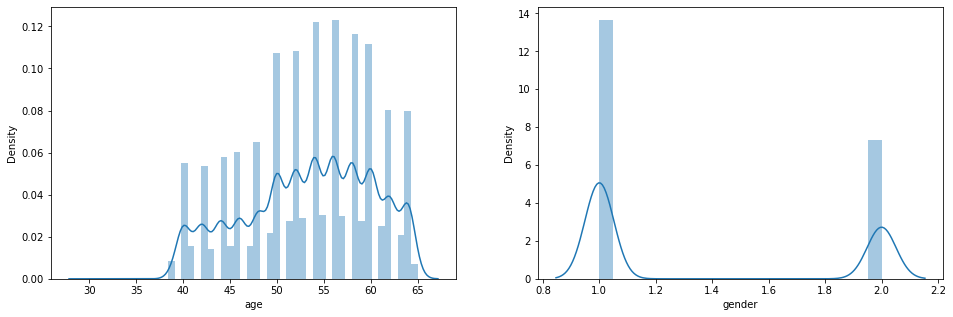

In [19]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['age'])
plt.subplot(1,2,2)
sns.distplot(data['gender'])
plt.show()

<AxesSubplot:xlabel='age'>

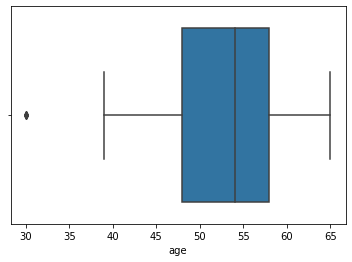

In [20]:
sns.boxplot(data['age'])

<AxesSubplot:xlabel='height'>

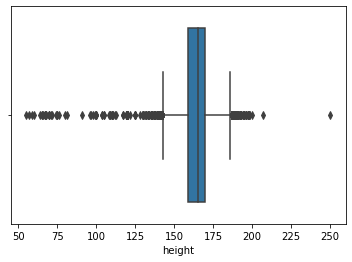

In [21]:
sns.boxplot(data['height'])

<AxesSubplot:xlabel='weight'>

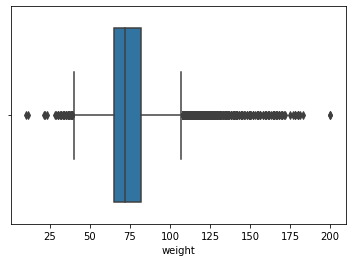

In [22]:
sns.boxplot(data['weight'])

In [23]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,output
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.204329,0.018757,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395953,0.701293,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,0.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,0.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,0.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,94.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)
# data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)

In [25]:
# data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))]

In [26]:
# data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))]

In [27]:
# data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)
# data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)

In [28]:
data.shape

(70000, 14)

<AxesSubplot:xlabel='weight'>

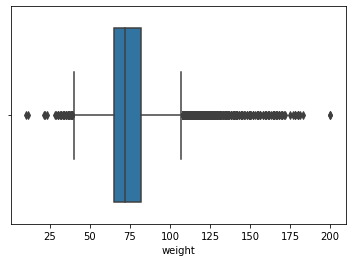

In [29]:
sns.boxplot(data['weight'])

<AxesSubplot:xlabel='height'>

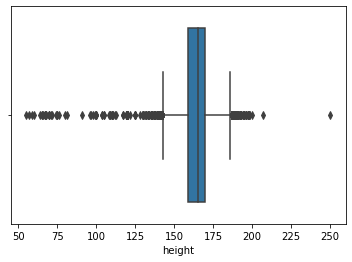

In [30]:
sns.boxplot(data['height'])

In [31]:
Q1 = data['height'].quantile(0.25)
Q3 = data['height'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['height']=np.where(data['height']>upper_whisker,upper_whisker,np.where(data['height']<lower_whisker,lower_whisker,data['height']))

<AxesSubplot:xlabel='height'>

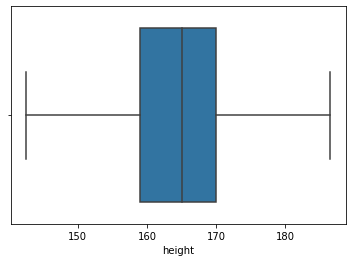

In [32]:
sns.boxplot(data['height'])

In [33]:
data.shape

(70000, 14)

In [34]:
Q1 = data['weight'].quantile(0.25)
Q3 = data['weight'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['weight']=np.where(data['weight']>upper_whisker,upper_whisker,np.where(data['weight']<lower_whisker,lower_whisker,data['weight']))

<AxesSubplot:xlabel='weight'>

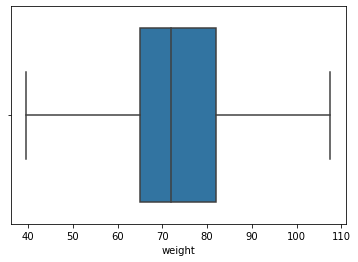

In [35]:
sns.boxplot(data['weight'])